# Representations, Kinematics and Dynamics

Duckietown exercises for Sept 16th, 2019



## 1. Frame manipulation

It's emergency time in Duckietown! An earthquake shook the quiet village, and some buildings have fallen on the streets.

### A. From robot to map
You are the head of operations, and you gave to your Duckiebot a critical recognition mission: identify and place road obstacles on the map.

During its mission, your Duckiebot has GPS support, and it knows its own position in the global (map) frame. 

It encounters its first obstacle when at position  x = 2m and y = 0.4m, and orientation theta = 110 degrees.
The obstacle itself is at 30 cm at 30 degrees (anti-clockwise) from the Duckiebot. 

Where on the map frame should obstacle 1 be placed?


In [1]:
### Run this cell to initialize the problem
import numpy as np

duckie_pos_g = np.array([2, 0.4])   # Position of Duckiebot in global frame
duckie_or_g = 110                   # Orientation of Duckiebot in global frame (degrees)
obstacle_dist_to_duckie = 0.3       # Obstacle distance to the Duckiebot
obstacle_angle = 30                 # Obstacle angle with respect to Duckiebot

Write your code here:

In [2]:
# Your calculations here

rot_in_rad_a = (np.pi * duckie_or_g) / 180.
rot_in_rad_b = (np.pi * obstacle_angle) / 180.
T_oa = np.array(([np.cos(rot_in_rad_a),-np.sin(rot_in_rad_a),duckie_pos_g[0]],
                 [np.sin(rot_in_rad_a),np.cos(rot_in_rad_a),duckie_pos_g[1]],
                 [0, 0, 1])) # Transformation matrix from origin (o) to the duckie (a)
dx = obstacle_dist_to_duckie * np.cos(rot_in_rad_b)
dy = obstacle_dist_to_duckie * np.sin(rot_in_rad_b)
T_ab =  np.array(([np.cos(rot_in_rad_b),-np.sin(rot_in_rad_b),dx],
                 [np.sin(rot_in_rad_b),np.cos(rot_in_rad_b),dy],
                 [0, 0, 1]))# Transformation matrix from duckie (a) to the obstacle (b)
T_ob = np.dot(T_oa,T_ab) # T_ob = (T_oa)(T_ab)
obstacle_pos_g = np.array([T_ob[0,2], T_ob[1,2]])    # Put your answer here instead of 0, 0 (position of obstacle in global frame)
print(obstacle_pos_g)

[1.77018667 0.59283628]


Include your answer in a text file in your submission in section 1.A of a text file: **kinematics.txt**

### B. From the global frame to the robot's
A concerned Duckie citizen calls you: 

`I can see a piece of roof on the road! It's positioned at x = 4m and y = - 1m!`

This is valuable information but, to add it to your map, you need your Duckiebot to verify it. Luckily, your Duckiebot is closeby, at x = 3.5m, y = -1.2m, and oriented at theta = 45 degrees.
You need to give a waypoint to your Duckiebot in its robot frame so that it can go and look.

In the robot frame, what are the cartesian coordinates of the obstacle described by the concerned Duckie citizen?

In [3]:
### Run this cell to initialize the problem

duckie_pos_g = np.array([3.5, -1.2])   # Position of Duckiebot in global frame
duckie_or_g = 45                       # Orientation of Duckiebot in global frame (degrees)
obstacle_pos_g = np.array([4, -1])     # Position of obstacle in global frame

Write your code here:

In [4]:
# Your calculations here

rot_in_rad_a = (np.pi * duckie_or_g) / 180.
T_oa = np.array(([np.cos(rot_in_rad_a),-np.sin(rot_in_rad_a),duckie_pos_g[0]],
                 [np.sin(rot_in_rad_a),np.cos(rot_in_rad_a),duckie_pos_g[1]],
                 [0, 0, 1])) # Transformation matrix from origin (o) to the duckie (a)
T_ob = np.array(([1, 0, obstacle_pos_g[0]],
                 [0, 1, obstacle_pos_g[1]],
                 [0, 0, 1])) # Transformation matrix from origin (o) to the obstacle (b)
T_ab = np.dot(np.linalg.inv(T_oa),T_ob)
obstacle_pos_r = np.array([T_ab[0,2], T_ab[1,2]])     # Put your answer here (position of obstacle in global frame)
print(obstacle_pos_r)

[ 0.49497475 -0.21213203]


Add your answer in section 1.B of **kinematics.txt**.

## 2. Driving

Good job! All the obstacles have been detected and mapped. Now, it's time for phase 2: acting.
Before anything, please run the cell below to get stuff working.

In [5]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
    
from utils.helpers import plot_poses, drive, calibrate_drive

INFO:aido-protocols:aido-protocols 5.0.5
10:08:39|zn|__init__.py:6|<module>(): zn 2.0.3
10:08:40|zj|__init__.py:5|<module>(): zj 2.0.4
10:08:40|gym-duckietown|__init__.py:10|<module>(): gym-duckietown 2019.0.0

10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-loop_pedestrians-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-small_loop_cw-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-loop_empty-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-loop_obstacles-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-zigzag_dists-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-straight_road-v0
10:08:40|gym-duckietown|__init__.py:24|reg_map_env(): Registering gym environment id: Duckietown-4way-v0


Now that you have run the cell above, you can continue.

In order to remove the obstacles that are paralyzing Duckietown, your Duckiebot is equipped with a very special tool that can lift obstacles, but only if it is used in the right direction.
What's more, the tool allows you to carry several obstacles at the same time - which is efficient. However, you can only give one command to the wheels between each of them...

You send your Duckiebot to gather obstacle 1 at x = -3m, y = 2m and theta = 45 degrees. Obstacle 2 is at x = 0m, y = 2m and theta = -45 degrees. 
Knowing that you want to join obstacle 2 exactly 10 seconds after having gathered obstacle 1, which commands do you send to the each of the wheels?

Write your values in `left_rate` and `right_rate` to test your answer. If it gets to the green arrow, you win!


Goal achieved! Great job!


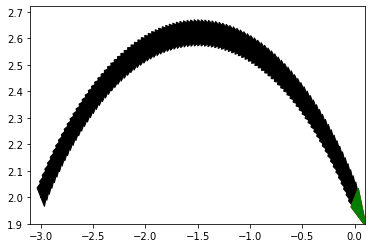

In [6]:
start_pos = [-3, 2]
cur_angle = 45          # angle in degrees
cur_pos = start_pos

wheel_dist = 0.2         # 0.2 meters of distance between the wheels
wheel_radius = 0.03      # radius of the wheels is 0.03 meters (3 cm)

dt = 0.1
total_timesteps = 100


####### Modify here

left_rate = 1.851099312     #  in turns per second
right_rate = 1.684437561 

#######

poses = [(cur_pos, cur_angle)]

for t in range(total_timesteps):
    cur_pos, cur_angle = drive(cur_pos, cur_angle, left_rate, right_rate, wheel_dist, wheel_radius, dt)
    poses.append((cur_pos, cur_angle))
    
    
plot_poses(poses, goal = (0, 2, -45))

Add your answer in section 2 of **kinematics.txt**.

## 3. Calibration

That went well!
But that's because the model we used is a simulation and the robot acts exactly as we tell it to act.
In real life... each robot has its own characteristics - for each wheel, the radius and the motor power are slighly different.
So we need to calibrate it.

In this exercise, the wheel radius, and the moter constant, of each wheel is modelled with some noise.
Of course, your robot does not know it, and when it tries to go straight forward, it will deviate from its trajectory!

To compensate this problem, adjust the gain and the trim so that the robot reaches the goal location in green - which is where it would be if the model was perfect.
The exercise is achieved when you get a "Goal achieved! Great job!" appearing on your screen!

Goal achieved! Great job!


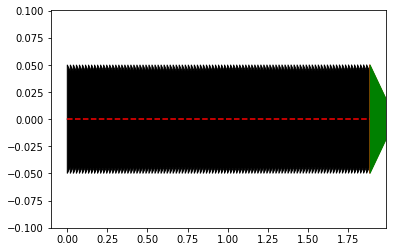

In [7]:
# Pick a number, any number!
seed = 500

# Adjust these!
gain = 1.01
trim = -0.0313

## From here, do not change

dt = 0.1
total_timesteps = 100

start_pos = [0, 0]
cur_pos = start_pos
cur_angle = 0

poses = [(cur_pos, cur_angle)]

for t in range(total_timesteps):
    cur_pos, cur_angle = calibrate_drive(cur_pos, cur_angle, gain, trim, dt, seed)
    poses.append((cur_pos, cur_angle))
   
plot_poses(poses, goal = (1.885, 0, 0), draw_line=True)

## 4. From linear and angular velocity to wheel commands

Until know, we have controlled the Duckiebot by sending it commands to control the *wheel velocities*.
It is often more practical to directly control the robot with commands of *linear and angular velocities* of the robot.

In this exercise, you will be asked to write a function that takes as arguments linear velocity `v` and angular velocity `omega` and returns the corresponding wheel angular speed `V_l` and `V_r`.

In your file `notebooks/code/exercise_02_kinematics/vel2wheel.py`, complete function `vel2wheel`. You can assume that the wheels have the same radius and the motors are exactly similar. Therefore, no trim is needed.


Setup the exercise by running this code.

In [8]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
    
from utils.helpers import plot_poses, drive
from notebooks.code.exercise_02_kinematics.vel2wheel import vel2wheel


To celebrate that Duckietown is now all clean thanks to you, a small parade is organized in Duckietown.
To show off your skills, you put a paintbrush on your Duckiebot so that it creates drawings on the ground wherever it goes. You want your robot write on the ground a **D**, first letter of Duckietown. 

Your painting reserves will last 100 seconds of painting, and your maximal speed is 0.5 meters/seconds. The **D** should be as large as possible knowing that the curved part of the **D** should be a half-circle. 

Control your robot in the following code using `v` and `omega` to create the best **D** drawing possible.

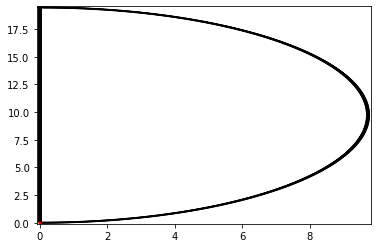

In [9]:
start_pos = [0, 0]
cur_angle = 0          # angle in degrees
cur_pos = start_pos

wheel_dist = 0.25         # 0.25 meters of distance between the wheels
wheel_rad = 0.04      # radius of the wheels is 0.04 meters (4 cm)

dt = 0.1
total_timesteps = 1000


poses = [(cur_pos, cur_angle)]

for t in range(total_timesteps):
    
    ### Modify code here depending on t (you can use if statements)
    v1 = 0.5 # The radius of circle will be maxed when v is set to max
    t1 = int((25 * np.pi) / (v1 + 0.25 * np.pi) * 10)
    t2 = t1 + 1 # Time to adjust robot heading towards origin set to 1ms (no omega limit specified)
    if t < t1:
        omega = (-180. / (t1*0.1)) * (np.pi/180)
        v = 0.5
    elif t >= t1 and t < t2: # Turn in place to correct heading towards origin
        omega = -(np.pi/2.) / ((t2 - t1)*0.1)
        v = 0
    else:
        omega = 0 # Go forward
        v = 0.5
    ###
    
    left_rate, right_rate =  vel2wheel(v, omega, wheel_dist, wheel_rad)     #  in turns per second
    cur_pos, cur_angle = drive(cur_pos, cur_angle, left_rate, right_rate, wheel_dist, wheel_rad, dt)
    poses.append((cur_pos, cur_angle))

plot_poses(poses)

Include the vel2wheel code in your submission file as **vel2wheel.py**, as well as a screenshot showing the final drawing **kinematics_D_drawing.png** and the associated code in the *for* loop in section 4 of **kinematics.txt**.

### Bonus

If you want to be more creative and make another drawing, whether it represents a Duckie, a smiley face, or anything else, you are very welcome to add another screenshot and its associated code in **kinematics_bonus_drawing.png** and the associated code in the *for* loop in section 4.Bonus of **kinematics.txt**. It is also valid if you use more than 1000 time steps.